# Creating some figures 

In [212]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean as cm
import marineHeatWaves as mhw
from datetime import date

In [213]:
import warnings
#warnings.filterwarnings("ignore")

In [321]:
# load data

file_name = "data/Rockall-Trough-Mooring-Time-Series-2020.nc"
ds = xr.open_dataset(file_name)

# making DEPTH a coordinate -› allows for calling specific depths (instead of the awkwared 20db grid the ds had before)
ds.coords['DEPTH'] = ds.PRES

# overwrite dataset and select only the variables of interst (temperature data)
ds = ds[['TG_EAST', 'TG_WEST']]

In [336]:
# creating two new variables in the ds that have the unit °C for temperature instead of K

# for TG_EAST
ds['TG_EAST_C'] = ds.TG_EAST-273.15
ds.TG_EAST_C.attrs = ds.TG_EAST.attrs 
ds.TG_EAST_C.attrs['units'] = 'degC'
ds.TG_EAST_C.attrs

# and TG_WEST
ds['TG_WEST_C'] = ds.TG_WEST-273.15
ds.TG_WEST_C.attrs = ds.TG_WEST.attrs 
ds.TG_WEST_C.attrs['units'] = 'degC'
ds.TG_WEST_C.attrs;

ds

<xarray.Dataset>
Dimensions:    (DEPTH: 101, TIME: 4667)
Coordinates:
  * TIME       (TIME) datetime64[ns] 2014-06-01 ... 2020-10-20
  * DEPTH      (DEPTH) float32 0.0 20.0 40.0 60.0 ... 1.96e+03 1.98e+03 2e+03
Data variables:
    TG_EAST    (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
    TG_WEST    (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
    TG_EAST_C  (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
    TG_WEST_C  (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/24)
    title:                         CLASS Rockall Trough mooring data 06/2014-...
    institution:                   Scottish Association for Marine Science, S...
    history:                       Delayed time processed quality controlled
    id:                            Rockall-Trough-Mooring-Time-Series-2020
    source:                        subsurface mooring
    project:                       Climate Linked Atlantic Sector Science
    ...                            ...
    citation:                      These data were collected and made freely ...
    acknowledgement:               Funding source: the UK Natural Environment...
    date_created:                  2021-04-15T23:49:44Z
    date_modified:                 2021-04-15T23:49:44Z
    processing_level:              
    QC_indicator:

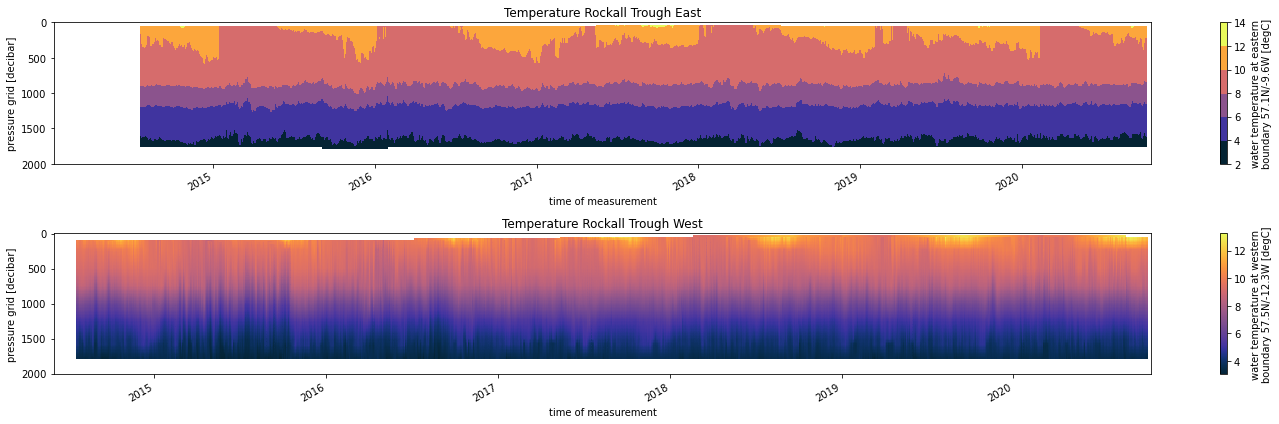

In [350]:
# a plot of the temperature data

# notes: 
# yincrease = False -› inverts the y-axis, setting ylim = (high, low) does the same (but limets need to be known)
# plot.contourf() creates a plot with more clearly defined contours

fig, ax = plt.subplots(2, 1, figsize = (20, 6))

ds.TG_EAST_C.plot.contourf(ax=ax[0], x = 'TIME', y = 'DEPTH', yincrease = False, xlim = date(2014,1,6), cmap = cm.cm.thermal);
ax[0].set_title("Temperature Rockall Trough East");

ds.TG_WEST_C.plot(ax=ax[1], x = 'TIME', yincrease = False, cmap = cm.cm.thermal);
ax[1].set_title("Temperature Rockall Trough West");

fig.tight_layout();

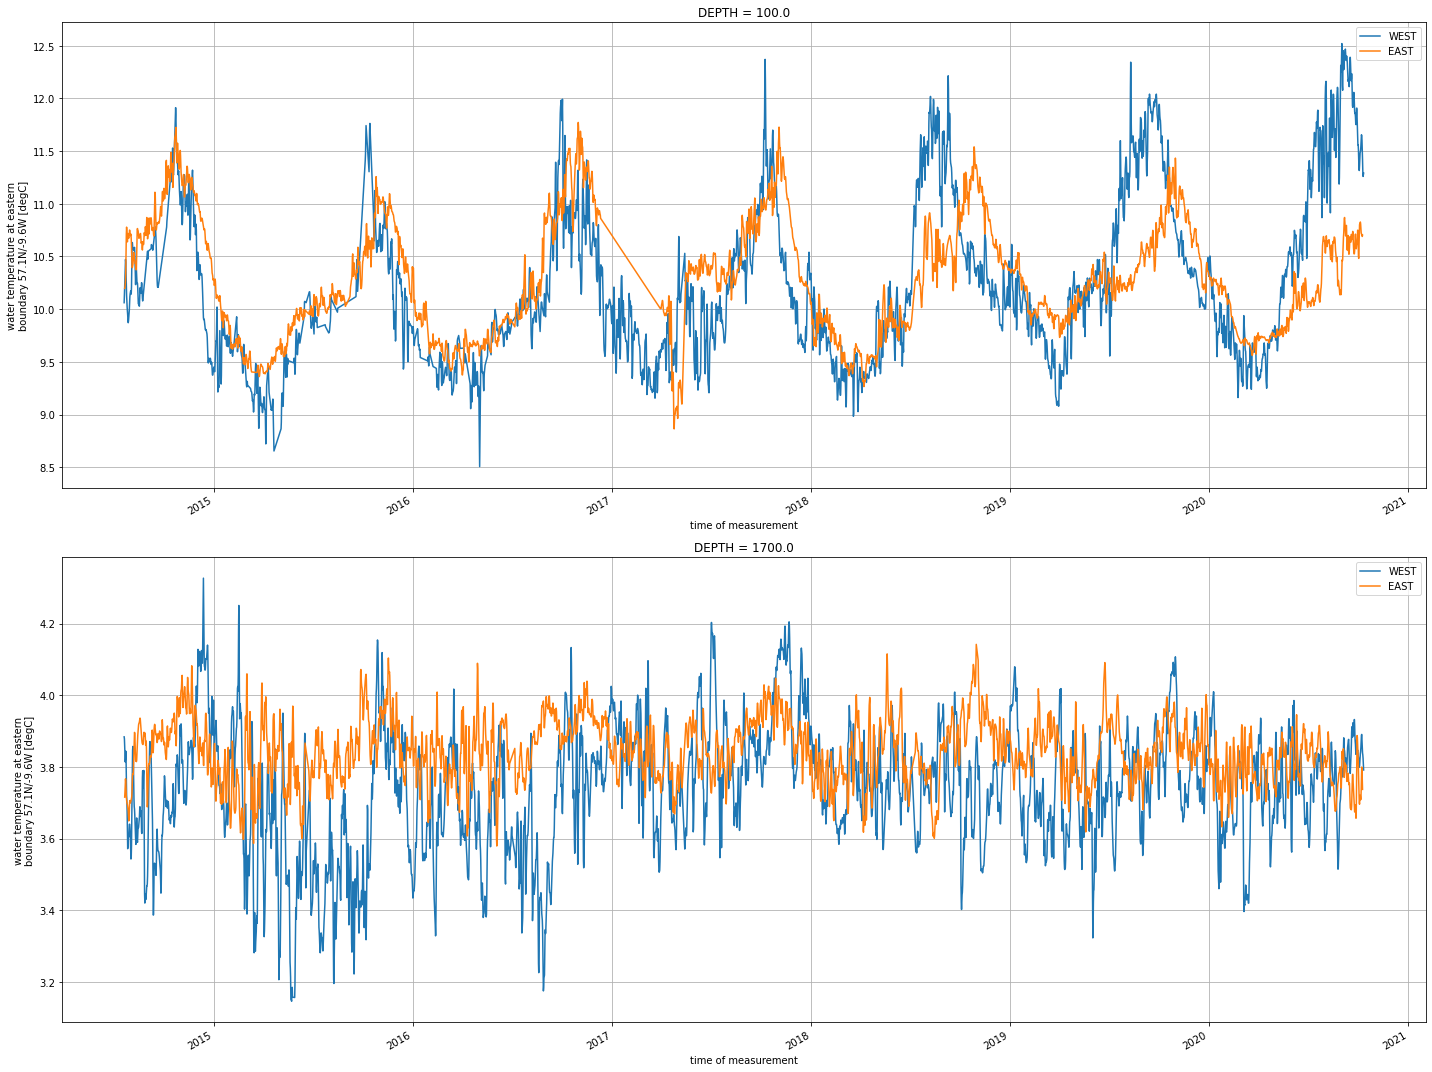

In [483]:
# extracting one temperature profile by slicing the dataset at a specific depth

# creating 4 plots that show the temperature at 100m and 1700m from the eastern and western boundary

fig, ax = plt.subplots(2, 1, figsize = (20, 15))

ds.TG_WEST_C.sel(DEPTH = 100).plot(ax=ax[0], label = 'WEST');
ds.TG_WEST_C.sel(DEPTH = 1700).plot(ax=ax[1], label = 'WEST');

ds.TG_EAST_C.sel(DEPTH = 100).plot(ax=ax[0], label = 'EAST');
ds.TG_EAST_C.sel(DEPTH = 1700).plot(ax=ax[1], label = 'EAST');

for axs in ax: 
    axs.legend()
    axs.grid()
#ax[1].legend()

fig.tight_layout();

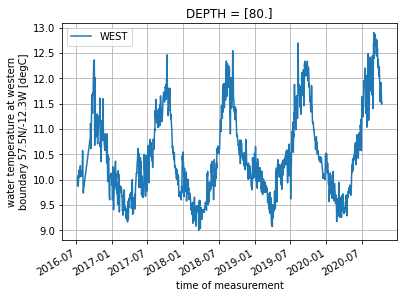

In [446]:
# another way of displaying the data to get an overview

ds.TG_WEST_C.sel(DEPTH=[80], method = 'nearest').plot.line(x = 'TIME', label = 'WEST');
#ds.TG_EAST_C.sel(DEPTH=[60], method = 'nearest').plot.line(x = 'TIME', label = 'EAST');
plt.grid()

plt.legend();

In [337]:
# resampling the dataset -› so that we have full days instead of half days -› by calculating the mean

ds1D = ds.resample(TIME = "1D").mean();

In [338]:
# makig sure that the new 1D data set has the same attributes as the original ds

ds1D.attrs = ds.attrs
ds1D

<xarray.Dataset>
Dimensions:    (DEPTH: 101, TIME: 2334)
Coordinates:
  * TIME       (TIME) datetime64[ns] 2014-06-01 2014-06-02 ... 2020-10-20
  * DEPTH      (DEPTH) float32 0.0 20.0 40.0 60.0 ... 1.96e+03 1.98e+03 2e+03
Data variables:
    TG_EAST    (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
    TG_WEST    (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
    TG_EAST_C  (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
    TG_WEST_C  (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/24)
    title:                         CLASS Rockall Trough mooring data 06/2014-...
    institution:                   Scottish Association for Marine Science, S...
    history:                       Delayed time processed quality controlled
    id:                            Rockall-Trough-Mooring-Time-Series-2020
    source:                        subsurface mooring
    project:                       Climate Linked Atlantic Sector Science
    ...                            ...
    citation:                      These data were collected and made freely ...
    acknowledgement:               Funding source: the UK Natural Environment...
    date_created:                  2021-04-15T23:49:44Z
    date_modified:                 2021-04-15T23:49:44Z
    processing_level:              
    QC_indicator:

In [424]:
#time = ds1D.TIME.dt.
time = np.arange(date(2014,6,1).toordinal(),date(2020,10,20).toordinal()+1,1)

In [ ]:
temp = ds1D.TG_EAST_C.sel(DEPTH = [400], method = 'nearest').squeeze().values

In [418]:
display(temp.values)
time

array([9.575273, 9.576393, 9.57711 , ..., 9.780866, 9.783682, 9.786137],
      dtype=float32)

array([735385, 735386, 735387, ..., 737716, 737717, 737718])

In [458]:
mhw.detect?

Signature:
mhw.detect(
    t,
    temp,
    climatologyPeriod=[2014.0, 2020.0],
    pctile=90,
    windowHalfWidth=5,
    smoothPercentile=True,
    smoothPercentileWidth=31,
    minDuration=5,
    joinAcrossGaps=True,
    maxGap=2,
    maxPadLength=False,
    coldSpells=False,
    alternateClimatology=False,
    Ly=False,
)
Docstring:
Applies the Hobday et al. (2016) marine heat wave definition to an input time
series of temp ('temp') along with a time vector ('t'). Outputs properties of
all detected marine heat waves.

Inputs:

  t       Time vector, in datetime format (e.g., date(1982,1,1).toordinal())
          [1D numpy array of length T]
  temp    Temperature vector [1D numpy array of length T]

Outputs:

  mhw     Detected marine heat waves (MHWs). Each key (following list) is a
          list of length N where N is the number of detected MHWs:

    'time_start'           Start time of MHW [datetime format]
    'time_end'             End time of MHW [datetime format]
    'time_p

In [453]:
mhws, clim = mhw.detect(time, temp)

# marine cold spells

mcss, clim_cold = mhw.detect(time, temp, coldSpells = True)

In [455]:
print(mhws['n_events'])
print(mcss['n_events'])


20
15


In [448]:
clim

{'thresh': array([9.80925726, 9.8087835 , 9.80758322, ..., 9.94296265, 9.9442814 ,
        9.94522316]),
 'seas': array([9.57527287, 9.57639267, 9.57711008, ..., 9.7808657 , 9.78368215,
        9.78613632]),
 'missing': array([ True,  True,  True, ...,  True,  True,  True])}

In [464]:
def plot_mhws(t,temp,clim):
    from matplotlib.dates import MonthLocator, YearLocator

    fig, ax = plt.subplots(figsize= (20,10))
    plt.plot(t,temp,label='temp')
    plt.plot(t,clim['seas'],label='clim')
    plt.plot(t,clim['thresh'], label='thresh')
    #plt.plot(ds1D.TIME,clim_cold['thresh'], label='thresh')
    plt.legend()

    yloc = YearLocator()
    mloc = MonthLocator()
    ax.xaxis.set_major_locator(yloc)
    ax.xaxis.set_minor_locator(mloc)

    plt.grid()


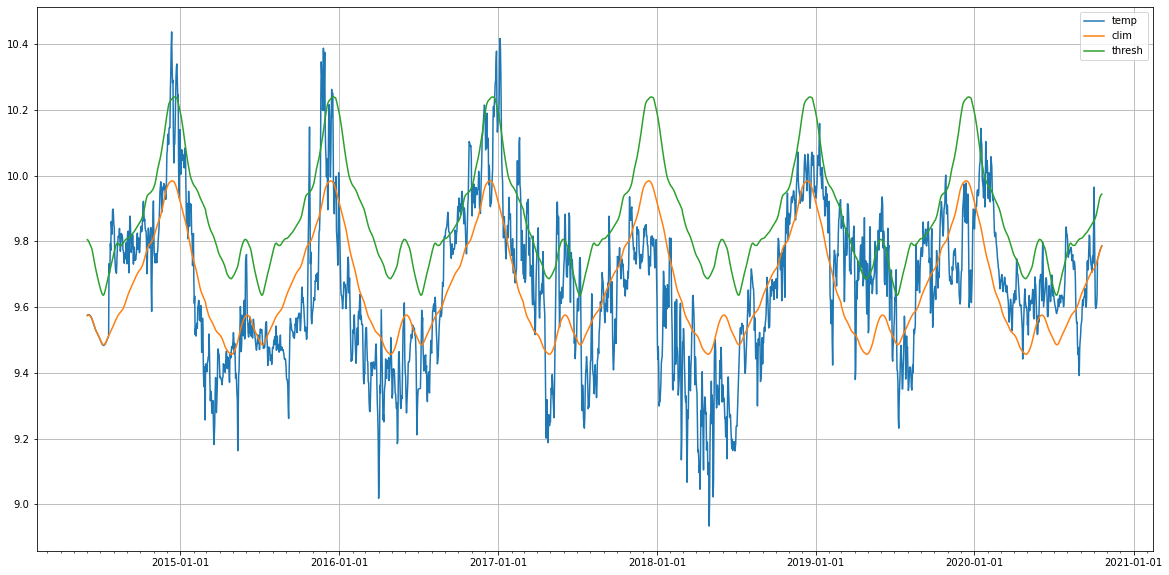

In [468]:
plot_mhws(ds1D.TIME,temp,clim)

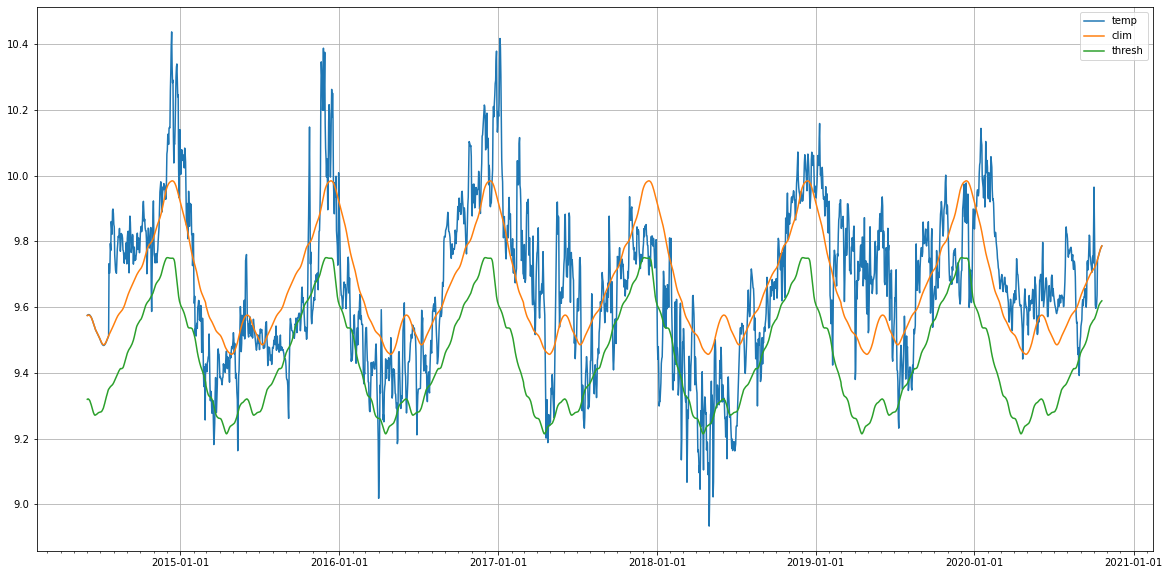

In [466]:
plot_mhws(ds1D.TIME,temp,clim_cold)

In [317]:
mhws, clim = mhw.detect(t, st)

In [318]:
mhws['n_events']

0

# Summary
what I did here was not very efficient or practical but it sort of gave me an idea what I was doing...
### Key points
- DEPTH is in a 20db grid -› this means that DEPTH 20 = 20*20db ~400m
- TIME resolution
- the algorithm did not detect anything for the data I fed it ... ~100 & 800m depth
- BUT I did not use my own climatology so I have no idea what the baseline is the algorithm tried to compare my data to or if the mhw package claculates the climatology from the availabel data??